In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [24]:
paths=["noSim_noReco_XHc_15000_events/1024_0.001_128_0.3_8/"]
prefix=["MC_studies/my6modes/"]

for i in range(len(paths)):
    print(paths[i])
    plotname_extension = paths[i]
    
    nfs_path = "/nfs/dust/belle2/user/axelheim/" + prefix[i]

    plot_path = "/afs/desy.de/user/a/axelheim/private/" + prefix[i]


    data_dir = Path((nfs_path + 'tb_logs/' + paths[i]))

    csv_dir = Path((nfs_path + 'tb_csv/' + paths[i]))
    csv_dir.mkdir(parents=True, exist_ok=True)

    plot_path = Path((plot_path + 'plots/' + paths[i]))
    plot_path.mkdir(parents=True, exist_ok=True)
    print("data_dir:",data_dir)
    tb_metrics = tabulate_metrics(data_dir, csv_dir)


    # choosing the tb_log with the most epochs recorded
    epochs = []
    for i in range(len(tb_metrics)):
        epochs.append(len(tb_metrics[i]))
        print(epochs[i])
        
    most_epochs_idx = 0
    if len(tb_metrics) > 1:
        most_epochs_idx = epochs.index(max(epochs))
        
    print(most_epochs_idx)
    print(len(tb_metrics))
    if len(tb_metrics) > 0:
        longest_run = tb_metrics[most_epochs_idx]

noSim_noReco_XHc_15000_events/1024_0.001_128_0.3_8/
data_dir: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/noSim_noReco_XHc_15000_events/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1627057242.batchg013.desy.de.151629.0

- Done
Converting run events.out.tfevents.1627054563.batchg013.desy.de.138480.0

Run events.out.tfevents.1627054563.batchg013.desy.de.138480.0 is empty, didn't process it 

Converting run events.out.tfevents.1627051397.batchg013.desy.de.122888.0

Run events.out.tfevents.1627051397.batchg013.desy.de.122888.0 is empty, didn't process it 

151
0
1


In [25]:
longest_run["Time/secs"] - longest_run["Time/secs"][0]

0          0.0
1        128.0
2        384.0
3        640.0
4        768.0
        ...   
146    30208.0
147    30464.0
148    30592.0
149    30848.0
150    31104.0
Name: Time/secs, Length: 151, dtype: float64

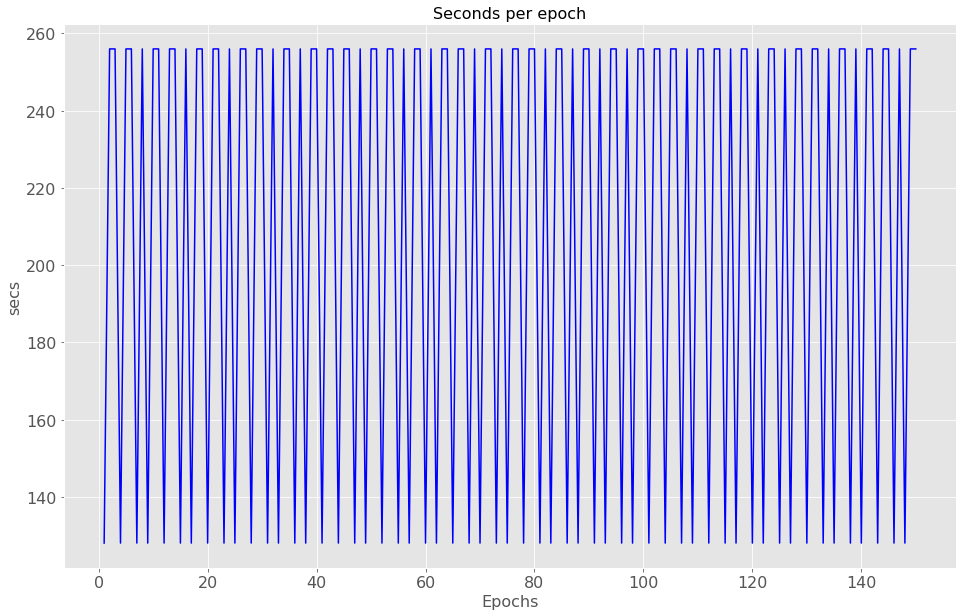

In [26]:
import matplotlib.pyplot as plt
title="Seconds per epoch"
ylabel="secs"
font = 16
plot_name = "time_" + plotname_extension

name=plt.figure(figsize=(16,10))#figsize=(3.487,3.487/1.618))
ax =plt.gca()

epoch_time = longest_run["Time/secs"] - longest_run["Time/secs"][0]
epoch_time_diff = epoch_time.diff()


#set ylim lower bound to zero
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_xlim(left=0)


epoch_time_diff.plot(x="Step", y="Value", color='b', ax=ax, alpha=1)#, label="time all")

name= plt.xlabel('Epochs', fontsize=font)
name= plt.ylabel(ylabel, fontsize=font)
name= plt.title(title, fontsize=font)
name = plt.xticks(fontsize=font, rotation=360)
name =  plt.yticks(fontsize=font, rotation=360)
#name= plt.legend(fontsize=font)

#plt.savefig(("/afs/desy.de/user/a/axelheim/private/MC_studies/my6modes/" + title + '_' + "noSim_noReco_BsXHc_15000_events_1024_0.001_512_0.3_4" + ".pdf"))


In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(epoch_time_diff)

0        NaN
1      128.0
2      256.0
3      256.0
4      128.0
5      256.0
6      256.0
7      128.0
8      256.0
9      128.0
10     256.0
11     256.0
12     128.0
13     256.0
14     256.0
15     128.0
16     256.0
17     128.0
18     256.0
19     256.0
20     128.0
21     256.0
22     256.0
23     128.0
24     256.0
25     128.0
26     256.0
27     256.0
28     128.0
29     256.0
30     256.0
31     128.0
32     256.0
33     128.0
34     256.0
35     256.0
36     128.0
37     256.0
38     128.0
39     256.0
40     256.0
41     128.0
42     256.0
43     256.0
44     128.0
45     256.0
46     256.0
47     128.0
48     256.0
49     128.0
50     256.0
51     256.0
52     128.0
53     256.0
54     256.0
55     128.0
56     256.0
57     128.0
58     256.0
59     256.0
60     128.0
61     256.0
62     128.0
63     256.0
64     256.0
65     128.0
66     256.0
67     256.0
68     128.0
69     256.0
70     128.0
71     256.0
72     256.0
73     128.0
74     256.0
75     128.0
76     256.0